In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns


sns.set(font_scale=1.5)
%matplotlib inline

Загрузим чуть-чуть обработанные данные, где удалены дубликаты первых 50000 поездок в таблице `trips.csv`.

In [10]:
DATA_DIR = "../data/processed/"

In [84]:
stations_data = pd.read_csv(DATA_DIR+"station.csv")
trips = pd.read_csv(DATA_DIR+"trips.csv", error_bad_lines=False, index_col=0)
weather = pd.read_csv(DATA_DIR+"weather.csv")

**Формулировка задачи на простом ”пользовательском” языке:**\
Мы займемся определением самых популярных станций, их визуализацией на карте города, а также определением самых популярных маршрутов.\
**Формулировка задачи на математическом языке:**


Самые популярные станции, откуда уезжают.

In [86]:
print(trips['from_station_name'].value_counts()[:10])

Pier 69 / Alaskan Way & Clay St           11274
E Pine St & 16th Ave                       9466
3rd Ave & Broad St                         9392
2nd Ave & Pine St                          8198
Westlake Ave & 6th Ave                     8188
Cal Anderson Park / 11th Ave & Pine St     7690
E Harrison St & Broadway Ave E             7685
2nd Ave & Vine St                          6568
Key Arena / 1st Ave N & Harrison St        6402
REI / Yale Ave N & John St                 6401
Name: from_station_name, dtype: int64


In [87]:
from_top_stations = trips['from_station_name'].value_counts()[:10].to_frame().index

In [88]:
top_stations_data = stations_data.loc[
    stations_data['name'].isin(from_top_stations)
]
top_stations_data['from_counter'] = trips['from_station_name'].value_counts()[:10].values
top_stations_data[['station_id', 'name', 'install_dockcount', 'current_dockcount']]

/home/denis/anaconda3/envs/mipt-stats/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,station_id,name,install_dockcount,current_dockcount
0,BT-01,3rd Ave & Broad St,18,18
1,BT-03,2nd Ave & Vine St,16,16
9,CBD-13,2nd Ave & Pine St,18,18
12,CH-02,E Harrison St & Broadway Ave E,18,20
16,CH-07,E Pine St & 16th Ave,18,18
17,CH-08,Cal Anderson Park / 11th Ave & Pine St,28,26
31,SLU-01,REI / Yale Ave N & John St,18,20
35,SLU-15,Westlake Ave & 6th Ave,12,20
39,SLU-19,Key Arena / 1st Ave N & Harrison St,12,16
52,WF-01,Pier 69 / Alaskan Way & Clay St,18,24


In [89]:
px.set_mapbox_access_token(open("../mapbox_token").read())
fig = px.scatter_mapbox(
    top_stations_data, 
    lat="lat", 
    lon="long",
    color="from_counter",
    text="name",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15, 
    zoom=11
)
fig.show()

In [90]:
to_top_stations = np.array(trips['to_station_name'].value_counts()[:10].to_frame().index)
top_stations_data = stations_data.loc[
    stations_data['name'].isin(from_top_stations)
]
top_stations_data['to_counter'] = trips['to_station_name'].value_counts()[:10].values
px.set_mapbox_access_token(open("../mapbox_token").read())
fig = px.scatter_mapbox(
    top_stations_data, 
    lat="lat", 
    lon="long",
    color="to_counter",
    text="name",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15, 
    zoom=11
)
fig.show()

/home/denis/anaconda3/envs/mipt-stats/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
popular_trips = trips.groupby(['from_station_id', 'to_station_id']).size().reset_index()
popular_trips = popular_trips.rename(columns={0:'counter'})

In [136]:
top_trips = popular_trips.sort_values(by='counter', ascending=False).head(10)

Кажется, что достаточно распространенная практика - это взять велосипед на прогулку и вернуть его туда же.

In [137]:
top_trips = top_trips.merge(stations_data[['station_id', 'name']], 
                left_on='from_station_id', 
                right_on='station_id')
top_trips = top_trips.drop(['from_station_id', 'station_id'], axis=1)
top_trips = top_trips.rename(columns={'name':'from_station_name'})

top_trips = top_trips.merge(stations_data[['station_id', 'name']], 
                left_on='to_station_id', 
                right_on='station_id')
top_trips = top_trips.drop(['to_station_id', 'station_id'], axis=1)
top_trips = top_trips.rename(columns={'name':'to_station_name'})

top_trips

,counter,from_station_name,to_station_name
0,4209,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St
1,1605,Seattle Aquarium / Alaskan Way S & Elliott Bay...,Pier 69 / Alaskan Way & Clay St
2,2291,Pier 69 / Alaskan Way & Clay St,Seattle Aquarium / Alaskan Way S & Elliott Bay...
3,1150,Seattle Aquarium / Alaskan Way S & Elliott Bay...,Seattle Aquarium / Alaskan Way S & Elliott Bay...
4,962,Pier 69 / Alaskan Way & Clay St,King Street Station Plaza / 2nd Ave Extension ...
5,1101,3rd Ave & Broad St,2nd Ave & Pine St
6,962,2nd Ave & Pine St,3rd Ave & Broad St
7,960,Lake Union Park / Valley St & Boren Ave N,Lake Union Park / Valley St & Boren Ave N
8,934,E Pine St & 16th Ave,Pine St & 9th Ave
9,880,Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,Burke-Gilman Trail / NE Blakeley St & 24th Ave NE


Рассмотрим влияние погодных условий на количество поездок(как влияет на количество поездок дождь/средняя температура и т.д., есть ли зависимость?) 

In [203]:
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['stoptime'] = pd.to_datetime(trips['stoptime'])
trips['Date'] = pd.to_datetime(trips['starttime'].dt.date)
weather['Date']= pd.to_datetime(weather['Date'])

In [204]:
num_trips_per_day = trips.groupby('Date').size().reset_index().rename(columns={0:'trips_counter'})

In [205]:
trips_and_weather = num_trips_per_day.merge(weather, on='Date')

Посмотрим какие события бывают в таблице с информацией о погоде.

In [206]:
trips_and_weather.Events.unique()

array(['Rain', nan, 'Rain , Snow', 'Fog', 'Fog , Rain',
       'Rain , Thunderstorm', 'Fog-Rain', 'Snow', 'Rain-Thunderstorm',
       'Rain-Snow'], dtype=object)

В `Events` обычного дня, без событий типа `Rain` и т.д. простави значение `Nothing`.

In [210]:
trips_and_weather['Events'] = trips_and_weather['Events'].fillna('Nothing')

In [226]:
correlations = trips_and_weather.drop(['Date', 'Events'], 
                       axis=1).corr(method='spearman')['trips_counter'].sort_values()[:-1]
correlations

Mean_Humidity                -0.700554
Min_Humidity                 -0.647427
Max_Humidity                 -0.588857
Precipitation_In             -0.568086
Mean_Wind_Speed_MPH          -0.207843
Max_Wind_Speed_MPH           -0.175602
Max_Sea_Level_Pressure_In    -0.080565
Mean_Sea_Level_Pressure_In    0.045906
Max_Visibility_Miles          0.059613
Min_Sea_Level_Pressure_In     0.125072
Mean_Visibility_Miles         0.449956
Min_Dewpoint_F                0.460969
Max_Dew_Point_F               0.480049
MeanDew_Point_F               0.509847
Min_Visibility_Miles          0.515462
Min_TemperatureF              0.677961
Mean_Temperature_F            0.776625
Max_Temperature_F             0.815100
Name: trips_counter, dtype: float64

Визуализируем полученные корреляции.

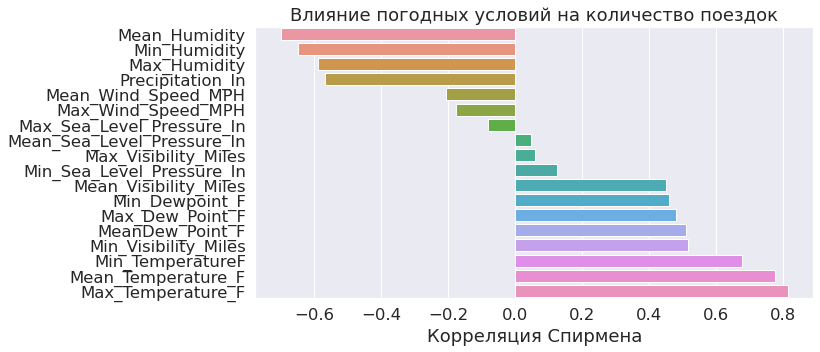

In [229]:
plt.figure(figsize=(10, 5))
sns.barplot(y=correlations.index, x=correlations)
plt.title('Влияние погодных условий на количество поездок')
plt.xlabel('Корреляция Спирмена')
plt.show()

Видим, что есть зависимость между количеством поездок и, например, средней температуры, что, вообще говоря, можно было ожидать.